In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import scanpy as sc
from os.path import join
import numpy as np
import anndata

### load data means (this snippet takes ~3 min to run, so a backup file is also generated in parallel.)

In [3]:
import scanpy as sc

from os.path import join

# !ls -ltrh 
import utils


## Load newly generated data

In [16]:
means = utils.get_means()

True /storage/groups/ml01/workspace/mo/for_nacho/Norman2019_prep_new.h5ad
True /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/fig4_predicted_adata_full.h5ad


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


True /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/figure4_latent_adata.h5ad

dimensions of embedding: (497800, 64)
all good. Removing datasets based on repetition is then tractable


In [17]:
means.shape

(5262, 5000)

In [18]:
sc.pp.neighbors(means, metric="cosine", use_rep='X', n_neighbors=30)
# sc.pp.neighbors(ad)
sc.tl.tsne(means)
sc.tl.umap(means)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [19]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
sc.set_figure_params(facecolor='white')

... storing 'type' as categorical
... storing 'a' as categorical
... storing 'b' as categorical


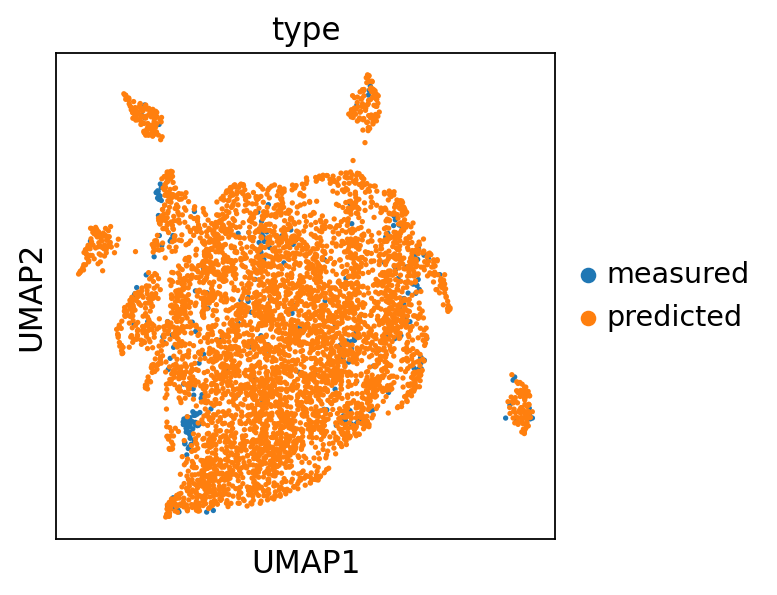

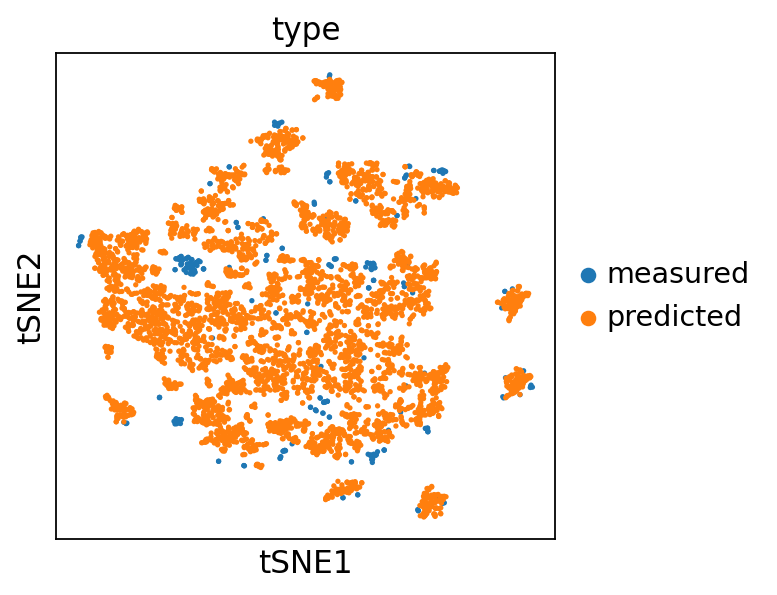

In [20]:
sc.pl.umap(means, color='type')
sc.pl.tsne(means, color='type')

In [21]:

# sns.boxplot(data=emb.obs, x='type', y='uncertainty_euclidean', order=['original data', 'generated'])

In [22]:
emb.obs[emb.obs['type'] == 'original data'].sort_values('uncertainty_euclidean')

NameError: name 'emb' is not defined

In [ ]:
ori = sc.read_h5ad(join('/storage/groups/ml01/workspace/mo/for_nacho', 'Norman2019_prep_new.h5ad'))

In [ ]:
ori

In [ ]:
ctrl = ori[ori.obs['condition'] == 'ctrl']

gene_name = 'KLF1'
lab_cond = {'%s+ctrl' % gene_name, 'ctrl+%s' % gene_name}
cond = ori[ori.obs['condition'].isin(lab_cond),:]

In [ ]:
ctrl.shape, cond.shape

### This function is in charge of returning the predicted and original mean values for expression levels based on the Norman et al dataset.

In [ ]:
sc.pp.neighbors(means, n_neighbors=20, metric='cosine')

In [ ]:
means.obs['a'] = means.obs.index.str.split('+').str[0]
means.obs['b'] = means.obs.index.str.split('+').str[1]
for gene_name in set(means.obs[['a', 'b']].values.flatten()):
    means.obs['is.%s' % gene_name] = ((means.obs['a'] == gene_name) | (means.obs['b'] == gene_name)).astype(int)

In [ ]:
means.obs['condition'] = means.obs.index

In [ ]:
sc.tl.tsne(means)

In [ ]:
from matplotlib import rcParams

In [ ]:
rcParams['figure.facecolor'] = 'white'
rcParams['figure.figsize'] = 10, 10

In [ ]:
sc.pl.tsne(means, color='type', groups='original data')

In [ ]:
means[means.obs.index.str.contains('CEBPA'),:].obs

In [ ]:
means.obs['gene.pair'] = means.obs.index.astype('category')

In [ ]:
means.obs['gene.pair'].value_counts()

In [ ]:
print('here...')

In [ ]:
sc.pl.tsne(means, color='gene.pair', groups='KLF1+CEBPA')

In [ ]:
sc.pl.tsne(means, color='is.CEBPA')

In [ ]:
# we'll try using highly variable genes to obtain a sense of genes that could be sub-explore
sc.pp.highly_variable_genes(means)

In [ ]:
# scale expression levesl
sc.pp.scale(means)

In [ ]:
means.var['highly_variable'].value_counts()

In [ ]:
import seaborn as sns

In [ ]:
sel = means[means.obs['is.KLF1'] == True,means.var.highly_variable]
# we'll try using highly variable genes to obtain a sense of genes that could be sub-explore
sc.pp.highly_variable_genes(sel)
print(sel.var['highly_variable'].value_counts())

In [ ]:
import pickle

In [ ]:
test = pickle.load(open('../data/de_genes/%s.pkl' % 'TSC22D1', 'rb'))

In [ ]:
test

In [ ]:
test[test['qval'] < 0.001].sort_values

### Supplementary figure 2

In [50]:
bkp_path = '../../data/fitting_coefs_rf_path.tsv.gz'
res = pd.read_csv(bkp_path, compression='gzip', index_col=0).reset_index(drop=True)
res['type'] = (res['a'] + '+' + res['b']).map(means.obs['type'].to_dict())
res['type'] = np.where(pd.isnull(res['type']), (res['b'] + '+' + res['a']).map(means.obs['type'].to_dict()), res['type'])
res['dominance'] = np.where(np.isnan(res['dominance']), np.abs(np.log10(res['c1'].abs() / res['c2'].abs())), res['dominance'])
res['type'].value_counts()
res[['c1', 'c2', 'lin_model_fit', 'dominance', 'magnitude', 'single_double_sim', 'single_sim', 'eq_contrib']]

,c1,c2,lin_model_fit,dominance,magnitude,single_double_sim,single_sim,eq_contrib
0,0.657379,0.847844,0.825617,0.110500,1.072840,0.812224,0.603949,0.953902
1,0.524637,0.417024,0.748988,0.099698,0.670189,0.722218,0.460502,0.829403
2,0.692014,0.420155,0.795139,0.216705,0.809576,0.795680,0.593480,0.835467
3,0.537784,0.876449,0.774499,0.212119,1.028287,0.766912,0.595023,0.835129
4,0.583784,0.830247,0.762233,0.152955,1.014945,0.757776,0.471485,0.677839
...,...,...,...,...,...,...,...,...
5049,0.620828,0.493407,0.811095,0.099766,0.793018,0.787824,0.558778,0.907621
5050,0.587663,0.407527,0.749302,0.158971,0.715140,0.748189,0.588978,0.803035
5051,0.805788,0.557697,0.841935,0.159823,0.979959,0.823541,0.591859,0.976830
5052,0.829028,0.361563,0.830904,0.360386,0.904442,0.834844,0.677087,0.800746


In [54]:
res['k'] = res['a'] + '+' + res['b']

In [126]:
import anndata
res = res.sort_values('type')
ad = anndata.AnnData(res[['dominance', 'magnitude', 'lin_model_fit', 'single_double_sim', 'single_sim', 'eq_contrib']].reset_index(drop=True).to_numpy(),
                    obs=res[['k']])
# ad.var_names = res[['dominance', 'magnitude', 'lin_model_fit', 'single_double_sim', 'single_sim', 'eq_contrib']].reset_index(drop=True)
ad.var_names = ['dominance', 'magnitude', 'lin_model_fit', 'single_double_sim', 'single_sim', 'eq_contrib']
# ad.obs['a'] = res['a'].reset_index(drop=True)
# ad.obs['b'] = res['b'].reset_index(drop=True)

# ad.obs = res.reset_index(drop=True)
# sc.pp.neighbors(ad)
# sc.tl.umap(ad)
# sc.tl.tsne(ad)

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [128]:
ad.obs_names = ad.obs['k']

In [130]:
ad.obs['a'] = ad.obs.index.str.split('+').str[0]
ad.obs['b'] = ad.obs.index.str.split('+').str[1]

In [131]:
double_tested_genes = set(means.obs[(means.obs['type'] == 'measured') & (~means.obs.condition.str.contains('ctrl'))][['a', 'b']].values.flatten())
# double_tested_genes

In [132]:
ad.obs['dom'] = ad.to_df()['dominance']
ad.obs['mag'] = ad.to_df()['magnitude']

In [133]:
ad

AnnData object with n_obs × n_vars = 5054 × 6
    obs: 'k', 'a', 'b', 'dom', 'mag'

In [134]:
ad.obs['a.tested.dual'] = ad.obs['a'].isin(double_tested_genes).astype(int)
ad.obs['b.tested.dual'] = ad.obs['b'].isin(double_tested_genes).astype(int)
ad.obs['n.genes.with.real.double.perturbation'] = (ad.obs['a.tested.dual'] + ad.obs['b.tested.dual']).astype('category')

In [135]:
ad.var_names

Index(['dominance', 'magnitude', 'lin_model_fit', 'single_double_sim',
       'single_sim', 'eq_contrib'],
      dtype='object')

In [136]:
res

,a,b,c1,c2,lin_model_fit,dominance,magnitude,single_double_sim,single_sim,eq_contrib,type,k
2550,UBASH3A,CBL,0.605535,1.196740,0.753040,0.295860,1.341215,0.762757,0.716295,0.876709,measured,UBASH3A+CBL
4047,PTPN9,CBL,1.069298,0.894908,0.908340,0.077320,1.394367,0.905361,0.762784,0.992672,measured,PTPN9+CBL
1031,SPI1,MAP2K6,0.461415,0.598240,0.825856,0.112784,0.755510,0.812562,0.578251,0.620890,measured,SPI1+MAP2K6
1039,SPI1,CEBPE,0.610399,1.150350,0.940201,0.275216,1.302264,0.922550,0.736965,0.895106,measured,SPI1+CEBPE
4731,PRTG,ETS2,0.866462,0.441456,0.912610,0.292862,0.972441,0.830057,0.482991,0.592776,measured,PRTG+ETS2
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,HES7,FOXO4,0.673535,0.810380,0.819394,0.080328,1.053738,0.809401,0.612259,0.922031,predicted,HES7+FOXO4
1699,HES7,SAMD1,0.742469,0.719854,0.803231,0.013434,1.034142,0.799363,0.627657,0.907049,predicted,HES7+SAMD1
1698,HES7,IKZF3,0.679366,0.836428,0.862669,0.090325,1.077567,0.837292,0.597420,0.880399,predicted,HES7+IKZF3
1705,HES7,AHR,0.715205,0.725174,0.802047,0.006012,1.018527,0.799556,0.625838,0.905443,predicted,HES7+AHR


In [137]:
ad.obs['uncertainty_cosine'] = ad.obs['a'].astype(str) + '+' + ad.obs['b'].astype(str)
ad.obs['uncertainty_cosine'] = (ad.obs['a'].astype(str) + '+' + ad.obs['b'].astype(str)).map(means.obs.set_index('condition')['uncertainty_cosine'].to_dict())
ad.obs['uncertainty_cosine'] = np.where(np.isnan(ad.obs['uncertainty_cosine']),
                                        (ad.obs['b'].astype(str) + '+' + ad.obs['a'].astype(str)).map(means.obs.set_index('condition')['uncertainty_cosine'].to_dict()),
                                        ad.obs['uncertainty_cosine'])

In [138]:
ad.var_names

Index(['dominance', 'magnitude', 'lin_model_fit', 'single_double_sim',
       'single_sim', 'eq_contrib'],
      dtype='object')

In [121]:
import matplotlib.pyplot as plt

In [142]:
rcParams['ps.fonttype'] = 42
rcParams['pdf.fonttype'] = 42

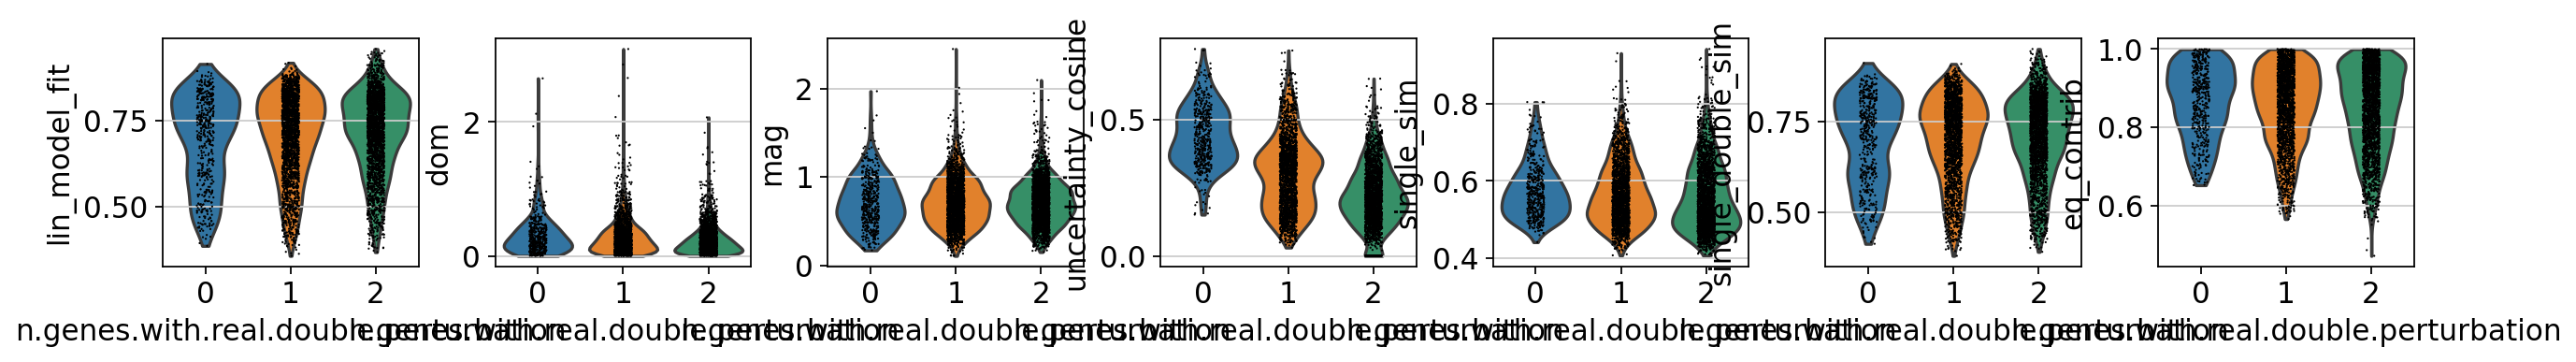

In [143]:
rcParams['figure.figsize'] = [3, 2]

keys1=['lin_model_fit', 'dom', 'mag']
keys2=['uncertainty_cosine', 'single_sim', 'single_double_sim', 'eq_contrib']
sc.pl.violin(ad, keys=keys1+keys2, groupby='n.genes.with.real.double.perturbation', frameon=False, ncol=7, show=False)
plt.savefig('../../data/figures/all_coperturbations.pdf')
plt.show() # plt.close()

In [95]:
sc.set_figure_params(facecolor='white')

In [96]:
from itertools import compress
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from statsmodels.nonparametric.api import KDEUnivariate
from scipy.signal import argrelextrema
from matplotlib.ticker import NullFormatter
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic
from umap import UMAP
from joblib import Parallel, delayed
from numpy.random import randint
from dcor import distance_correlation
import os
from tqdm import tqdm, tqdm_notebook
import six
from adjustText import adjust_text

def _type_of_script():
    try:
        ipy_str = str(type(get_ipython()))
        if 'zmqshell' in ipy_str:
            return 'jupyter'
        if 'terminal' in ipy_str:
            return 'ipython'
    except:
        return 'terminal'
    
def progress(it):
    env = _type_of_script()
    if hasattr(it, '__len__'):
        total = len(it)
    else:
        total = None
    if env == 'jupyter':
        return tqdm_notebook(it, total=total)
    else:
        return tqdm(it, total=total)

def _test_umap(xdata, random_state, **kwargs):
    transformer = UMAP(random_state=random_state, **kwargs)
    x = transformer.fit_transform(xdata)
    return x, random_state, distance_correlation(xdata, x)

# def _get_umap(xdata, random_state, **kwargs):
#     transformer = UMAP(random_state=random_state, **kwargs)
#     x = transformer.fit_transform(xdata)
#     return x

def optimal_umap(xdata, n, n_jobs=1, **kwargs):
    rnds = randint(0, 1000*n, n)
    
    # written in a slightly wonky way on purpose... as soon as UMAP is run outside joblib child processes,
    # they silently hang afterward. Perhaps some bad interaction with numba
    if n_jobs > 1:    
        out = Parallel(n_jobs=n_jobs, verbose=10)(delayed(_test_umap)(xdata=xdata, random_state=r, **kwargs) for r in rnds)
        x, r, scores = zip(*out)
    else:
        r = np.zeros(rnds.shape)
        scores = np.zeros(rnds.shape)
        x = dict()
        for i, random_state in progress(list(enumerate(rnds))):
            x[i], r[i], scores[i] = _test_umap(xdata=xdata, random_state=random_state, **kwargs)
        
    return x[np.argmax(scores)], int(r[np.argmax(scores)]), zip(x, r, scores)

def minimize_clusters(run_data, cluster_num, skip=0):
    xs, rs, scores = zip(*run_data)
    scores = np.array(scores)
    
    sortind = np.argsort(scores)[::-1]
    
    for i, ind in enumerate(sortind):
        n_clusters = len(_kde_bins(xs[ind].astype(float))[0])/2
        if n_clusters == cluster_num:
            if skip == 0:
                print('{0}th highest scoring iteration has desired number of clusters (score: {1})'.format(i, scores[ind]))
                return xs[ind], rs[ind]
            else:
                print('Skipping match...')
                skip -= 1
    else:
        print('Did not find solution with desired number of clusters')
        return xs[sortind[0]], rs[sortind[0]]

def _kde_bins(data, threshold=None):
    kde = KDEUnivariate(data)
    kde.fit("gau", 0.25, gridsize=1000)
    grid, z = kde.support, kde.density
    
    if threshold is None:
        min_pos = argrelextrema(kde.density, np.less)[0]
        # add in the two end points
        min_pos = np.append(min_pos, [0, len(kde.density) - 1])
        min_pos = np.unique(min_pos)
        minima = kde.density[min_pos]
        maxima = kde.density[argrelextrema(kde.density, np.greater)[0]]
        # find the highest peak, and then look for the largest
        # local minimum that is less than 20% its height
        # this ensures dips in density in tightly packed regions
        # are respected
        threshold = 1.2*np.max(minima[minima < 0.2*maxima.max()])

    zero_crossings = np.where(np.diff(np.sign(z - threshold)))[0]
    return grid[zero_crossings], grid, z

def _get_bin_patch(bin_left, width, height, color, bottom=0, angle=0):
    return patches.Rectangle(
        (bin_left, bottom),
        width,
        height,
        zorder=0,
        color=color,
        angle=angle
    )

def bins_to_patches(bins, height, c, bottom=0, orientation='vertical'):
    if orientation == 'vertical':
        lefts = bins[:-1]
        rights = bins[1:]
        widths = rights - lefts     
    else:
        lefts = [bottom,]*(len(bins) - 1)
        bottoms = bins[1:]
        widths = bins[1:] - bins[:-1]
    
    if isinstance(c, str):
        cs = [c,]*(len(bins) - 1)
    else:
        cs = c
    
    if orientation == 'vertical':
        if hasattr(height, '__len__'):
            return [_get_bin_patch(lefts[i], widths[i], height[i], cs[i], bottom) for i, _ in enumerate(lefts)]
        else:
            return [_get_bin_patch(lefts[i], widths[i], height, cs[i], bottom) for i, _ in enumerate(lefts)]        
    else:
        if hasattr(height, '__len__'):
            return [_get_bin_patch(lefts[i], widths[i], height[i], cs[i], bottoms[i], angle=-90) for i, _ in enumerate(lefts)]
        else:
            return [_get_bin_patch(lefts[i], widths[i], height, cs[i], bottoms[i], angle=-90) for i, _ in enumerate(lefts)]
        
def _normalized_stat(stat, quantiles=None, vmin=None, vmax=None, symmetric=False):
    if quantiles is not None:
        if symmetric is False:
            low_quantile = stat.quantile(quantiles[0])
            high_quantile = stat.quantile(quantiles[1])
        else:
            abs_quantile = np.min([np.abs(stat.quantile(quantiles[0])), np.abs(stat.quantile(quantiles[1]))])
            low_quantile = -abs_quantile
            high_quantile = abs_quantile
        norm = matplotlib.colors.Normalize(vmin=low_quantile, vmax=high_quantile, clip=True)
    else:
        norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    stat = stat.map(lambda x: norm(x))
    return stat

def heat_scatter(x, y, statistic, threshold=None, quantiles=[0, 0.95],
                 vmin=None, vmax=None, figsize=None, summary='heatmap', plot_midpoint=False, plot_scatter=True,
                 ax=None, orientation='vertical', cmap='Blues', ymin=None, ymax=None):
    bins, _, _ = _kde_bins(x, threshold=threshold)
    binned_stat = binned_statistic(x, y, statistic, bins=bins)
    midpoints = (bins[1:] + bins[:-1])/2.0
    binned_stat = pd.Series(binned_stat.statistic)
    make_patch = ~binned_stat.isnull()
    binned_stat = binned_stat.fillna(0)
    
    if orientation == 'horizontal':
        w = x.copy()
        x = y.copy()
        y = w

    if ax is None:
        plt.figure(figsize=figsize)
        ax = plt.gca()
        
    plt.sca(ax)
    
    if summary == "heatmap":
        cm = plt.cm.get_cmap(cmap)
        if vmin is None:
            cs = _normalized_stat(binned_stat, quantiles=quantiles)
        else:
            cs = _normalized_stat(binned_stat, vmin=vmin, vmax=vmax)
        cs = cm(cs)
        if plot_scatter:
            plt.scatter(x, y, s=5, color='lightgray')
            if ymin is None:
                if orientation == 'vertical':
                    ymin, ymax = plt.ylim()
                else:
                    ymin, ymax = plt.xlim()
        else:
            ymin, ymax = 0, 1
            ax.set_xlim(np.min(bins)*1.05,np.max(bins)*1.05)

        ymin = np.min([ymin, 0])
        ps = bins_to_patches(bins, ymax - ymin, cs, orientation=orientation, bottom=ymin)
        ps = compress(ps, make_patch)
        for p in ps:
            ax.add_patch(p)
        if orientation == 'vertical':
            ax.set_ylim(ymin, ymax)
        else:
            ax.set_xlim(ymin, ymax)
    elif summary == "bar":
        if plot_scatter:
            plt.scatter(x, y, s=5, color='SteelBlue')
        else:
            ax.set_ylim(np.min(binned_stat)*0.95, np.max(binned_stat)*1.1)
            ax.set_xlim(np.min(bins)*1.05,np.max(bins)*1.05)
        ymin, ymax = plt.ylim()
        ymin = np.min([ymin, 0])
        ps = bins_to_patches(bins, binned_stat, 'lightgray', orientation=orientation, bottom=ymin)
        ps = compress(ps, make_patch)
        for p in ps:
            ax.add_patch(p)
            
    if plot_midpoint:
        plt.scatter(list(compress(midpoints, make_patch)),
                list(compress(binned_stat, make_patch)),
                marker='_', color='orangered')        
    
    if orientation == 'vertical':
        plt.xticks([]);
    else:
        plt.yticks([]);
        for tick in ax.get_xticklabels():
            tick.set_rotation(-90)
    
    return binned_stat, bins    
    
    
def onesense(x, y, c, xs, ys, 
             xlabels=None, ylabels=None, left=0.10, width=0.7, bottom=0.1, height=0.7,
                              scatter_pad=0.02, marginal_pad = 0.01, figsize=[7,7],
                              scatter_cmap='RdBu_r', cmaps=None, annotations=None,
                              label=False, xlims=None, ylims=None,
                              s=25):

    bottom_h = left_h = left + width + scatter_pad

    nx = len(xs)
    ny = len(ys)

    bottom_steps = np.linspace(bottom_h, 1, nx + 1)
    dbottom = np.diff(bottom_steps)[0] - marginal_pad
    bottom_steps = bottom_steps[:-1]
    left_steps = np.linspace(left_h, 1, ny + 1)
    dleft = np.diff(left_steps)[0] - marginal_pad
    left_steps = left_steps[:-1]

    rect_scatter = [left, bottom, width, height]

    x_rects = [[left, b, width, dbottom] for b in bottom_steps]
    y_rects = [[l, bottom, dleft, height] for l in left_steps]

    # start with a rectangular Figure
    fig = plt.figure(1, figsize=figsize)
    nullfmt = NullFormatter() 
    axScatter = plt.axes(rect_scatter)
    axScatter.xaxis.set_major_formatter(nullfmt)
    axScatter.yaxis.set_major_formatter(nullfmt)
    plt.xticks([])
    plt.yticks([])

    axxs = dict()
    axys = dict()
    
    for i, rect in enumerate(x_rects):
        
        axxs[i] = plt.axes(rect)
        axxs[i].xaxis.set_major_formatter(nullfmt)
        if xlabels is not None:
            axxs[i].text(-0.08, 0.5, xlabels[i],
            horizontalalignment='right',
            verticalalignment='center',
            transform=axxs[i].transAxes)
    for i, rect in enumerate(y_rects):
        axys[i] = plt.axes(rect)
        axys[i].yaxis.set_major_formatter(nullfmt)
        if ylabels is not None:
            axys[i].text(0.3, 1.02, ylabels[i],
            horizontalalignment='left',
            verticalalignment='bottom',
            rotation=60,
            transform=axys[i].transAxes)
        
    fig.text(0,0, ' ')

    # the scatter plot:
    # quant_min = np.min([np.abs(c.quantile(0.02)), c.quantile(0.98)])
    
    # norm = matplotlib.colors.Normalize(vmin=-quant_min, vmax=quant_min, clip=True)
    
    # c = c.map(lambda x: norm(1.1*x))
    
    # print(c, min(c), max(c))
    axScatter.scatter(x, y, c=c, s=s, cmap=plt.cm.get_cmap(scatter_cmap), edgecolor='lightgray')

    if label:
        texts = list()
        for name, xpos in x.iteritems():
            ypos = y.loc[name]
            texts.append(axScatter.text(xpos, ypos, name, fontsize=7))
        adjust_text(texts, ax=axScatter, lim=5)
    
    if cmaps is None:
        cmaps = ['Blues',]*np.max([nx, ny])
    
    if xlims is None:
        xlims = ((None, None),)*len(xs)
    if ylims is None:
        ylims = ((None, None),)*len(ys)

    for i, data in enumerate(xs):
        statx, binsx = heat_scatter(x, data, 'median', ax=axxs[i], cmap=cmaps[i], ymin=xlims[i][0], ymax=xlims[i][1])
    for i, data in enumerate(ys):
        staty, binsy = heat_scatter(y, data, 'median', ax=axys[i], cmap=cmaps[i], orientation='horizontal', ymin=ylims[i][0], ymax=ylims[i][1])
        
    midpointsx = (binsx[1:] + binsx[:-1])/2.0
    make_patchx = ~(statx == 0)
    midpointsx = list(compress(midpointsx, make_patchx))
    for j, mid in enumerate(midpointsx):
        axxs[len(axxs) - 1].text(mid, 1, j, horizontalalignment='center')
        
    clustersx = np.array(pd.Series(x).map(lambda x: find_nearest(midpointsx, x)).values)

    midpointsy = (binsy[1:] + binsy[:-1])/2.0
    make_patchy = ~(staty == 0)
    midpointsy = list(compress(midpointsy, make_patchy))
    for j, mid in enumerate(midpointsy):
        axys[len(axys) - 1].text(1, mid, j, verticalalignment='center')
    clustersy = np.array(pd.Series(y).map(lambda y: find_nearest(midpointsy, y)).values)
    
    if annotations is not None:
        topsy = list(compress(binsy[1:], make_patchy))
        bottomsy = list(compress(binsy[:-1], make_patchy))
        leftsx = list(compress(binsx[:-1], make_patchx))
        rightsx = list(compress(binsx[1:], make_patchx))
        
        ind = np.lexsort(zip(*annotations))
        annotations = annotations[ind]
        ax, ay = zip(*annotations)
        ax = np.array(ax)
        ay = np.array(ay)   
        
        for i in np.unique(ay):
            x_offset = 0.25
            for j in ax[ay == i]:
                ann = '\n'.join(clustersx[(clustersy == i) & (clustersx == j)].index)
                axys[len(axys) - 1].text(1 + x_offset, topsy[i], ann, verticalalignment='top', fontsize=7)
                x_offset = x_offset + 1.5
                axScatter.add_patch(patches.Rectangle((leftsx[j], bottomsy[i]), rightsx[j] - leftsx[j], topsy[i] - bottomsy[i],
                                   fill=False, edgecolor='lightgrey'))
                
    return clustersx, clustersy
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [97]:
res_orig = res[res['type'] == 'original data']

In [98]:
import anndata
res_orig = res_orig.sort_values('type')
ad_ori = anndata.AnnData(res_orig[['lin_model_fit', 'dominance', 'magnitude', 'single_double_sim', 'single_sim', 'eq_contrib']])
sc.pp.neighbors(ad_ori)
sc.tl.umap(ad_ori)

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]))

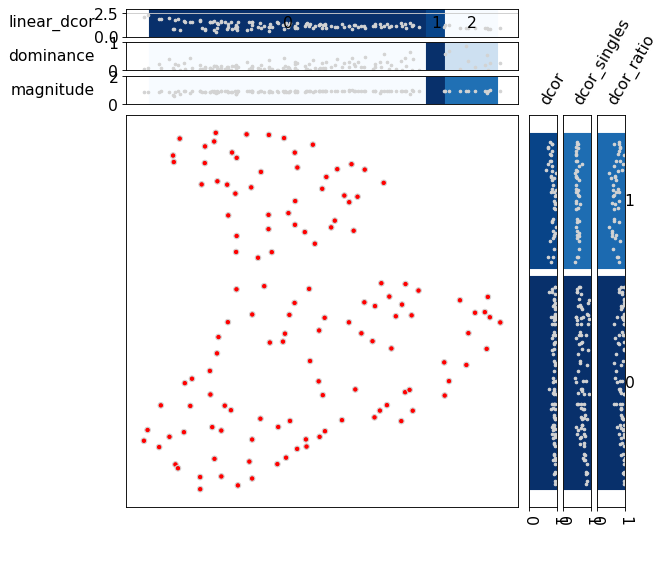

In [99]:
xs = [res_orig['lin_model_fit'], res_orig['dominance'], res_orig['magnitude']]
ys = [res_orig['single_double_sim'], res_orig['single_sim'], res_orig['eq_contrib']]

c = (res_orig['type'] == 'generated') * 100

# x[c == False], y[c == False]

x = ad_ori.obsm['X_umap'][:,0]
y = ad_ori.obsm['X_umap'][:,1]
onesense(x, y, np.where(res_orig['type'] == 'original data', 'red', 'gray'), xs, ys,  cmaps=['Blues', 'Blues', 'Blues', 'Blues'],
         s=25, scatter_cmap='RdGy',
         ylims=((0, 1), (0, 1), (0, 1)), xlims=((0, 2), (0, 1), (0, 3)),
         xlabels=['magnitude', 'dominance', 'linear_dcor'], ylabels=['dcor', 'dcor_singles', 'dcor_ratio'])

In [25]:
import anndata
res = res.sort_values('type')
ad = anndata.AnnData(res[['dominance', 'magnitude', 'lin_model_fit', 'single_double_sim', 'single_sim', 'eq_contrib']].reset_index(drop=True))
ad.obs = res.reset_index(drop=True)
sc.pp.neighbors(ad)
sc.tl.umap(ad)
sc.tl.tsne(ad)

KeyError: 'type'

In [101]:
# include the cosine similarity, from the original data
emb = sc.read_h5ad(join(input_directory, 'embedding_sweep_Norman2019_prep_new_relu_model_seed=16_epoch=80.h5ad'))
# emb.shape

emb.obs['a'] = emb.obs['condition'].str.split('+').str[0]
emb.obs['b'] = emb.obs['condition'].str.split('+').str[1]
emb.obs['value'] = 1
ad.obs['uncertainty_cosine'] = ad.obs['a'].astype(str) + '+' + ad.obs['b'].astype(str)
ad.obs['uncertainty_cosine'] = (ad.obs['a'].astype(str) + '+' + ad.obs['b'].astype(str)).map(emb.obs.set_index('condition')['uncertainty_cosine'].to_dict())
ad.obs['uncertainty_cosine'] = np.where(np.isnan(ad.obs['uncertainty_cosine']),
                                        (ad.obs['b'].astype(str) + '+' + ad.obs['a'].astype(str)).map(emb.obs.set_index('condition')['uncertainty_cosine'].to_dict()),
                                        ad.obs['uncertainty_cosine'])

In [102]:
ad.obs['lin.model.fit'] = ad.obs['lin_model_fit']
ad.obs['single.double.sim'] = ad.obs['single_double_sim']
ad.obs['single.sim'] = ad.obs['single_sim']
ad.obs['eq.contrib'] = ad.obs['eq_contrib']
ad.obs['dom'] = ad.obs['dominance']
ad.obs['mag'] = ad.obs['magnitude']



In [107]:
xs = [res['lin_model_fit'], res['dominance'], res['magnitude']]
ys = [res['single_double_sim'], res['single_sim'], res['eq_contrib']]

c = (res['type'] == 'generated') * 100

# x[c == False], y[c == False]

rcParams['figure.dpi'] = 100

x = ad.obsm['X_tsne'][:,0]
y = ad.obsm['X_tsne'][:,1]
onesense(x, y, np.where(res['type'] == 'original data', 'red', 'white'), xs, ys,  cmaps=['Blues', 'Blues', 'Blues', 'Blues'],
         s=25, scatter_cmap='RdGy',
         ylims=((0, 1), (0, 1), (0, 1)), xlims=((0, 2), (0, 1), (0, 3)),
         xlabels=['magnitude', 'dominance', 'linear_dcor'], ylabels=['dcor', 'dcor_singles', 'dcor_ratio'])
plt.savefig('../data/figures/global_tsne_six_metrics.pdf')
plt.close()
rcParams['figure.dpi'] = 50
sc.pl.tsne(ad, color=['lin.model.fit', 'dom', 'mag', 'single.double.sim', 'single.sim', 'eq.contrib'],
           cmap='Reds', frameon=False, ncols=2, show=False)
plt.savefig('../data/figures/global_tsne_by_metric.pdf')
plt.close()


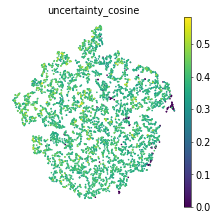

In [104]:
rcParams['figure.figsize'] = [5, 5]
sc.pl.tsne(ad, color='uncertainty_cosine', cmap='viridis', frameon=False)

In [108]:
ad.obs['condition'] = ad.obs['a'] + '+' + ad.obs['b']
for gene_name in set(ad.obs[['a', 'b']].values.flatten()):
    ad.obs['is.%s' % gene_name] = ((ad.obs['a'] == gene_name) | (ad.obs['b'] == gene_name)).astype(int)


TypeError: unsupported operand type(s) for +: 'Categorical' and 'str'

In [ ]:
from matplotlib import rcParams

In [ ]:
ad.obs['type'].value_counts()

### By Gene Name

In [109]:
def plot_by_gene_name(ad, gene_name):
    ad.obs['color'] = np.where(ad.obs['is.%s' % gene_name] & (ad.obs['type'] == 'generated'), 'predicted',
                               np.where(ad.obs['is.%s' % gene_name] & (ad.obs['type'] == 'original data'), 'real', 'bg'))
    ad.obs['color'].value_counts()

    ad.obs['size'] = np.where(ad.obs['is.%s' % gene_name] & (ad.obs['type'] == 'generated'), 100,
                               np.where(ad.obs['is.%s' % gene_name] & (ad.obs['type'] == 'original data'), 250, 5))
    ad.obs['text'] = np.where(ad.obs['is.%s' % gene_name], np.where(ad.obs['a'] == gene_name, ad.obs['b'], ad.obs['a']), '')
    ad.obs['text'].value_counts()

    rcParams['figure.figsize'] = [7, 7]
    rcParams['figure.dpi'] = 100
    ax = plt .subplot()

    x, y, t = ad.obsm['X_tsne'][:,0], ad.obsm['X_tsne'][:,1], ad.obs['text']
    for xi, yi, ti in zip(x, y, t):
        if ti == '':
            continue
        ax.text(xi + .1, yi + .1, ti, fontsize=5, zorder=10, rotation=45, fontweight='bold')

    sc.pl.tsne(ad, color='color', cmap='Reds', s=ad.obs['size'], title='is.%s' % gene_name,
               palette=['gray', 'green', 'red'], frameon=False, ax=ax)




In [110]:
plot_by_gene_name(ad, 'NCL')

KeyError: 'is.NCL'

In [ ]:
plot_by_gene_name(ad, 'KLF1')

In [ ]:
plot_by_gene_name(ad, 'KLF1')
plot_by_gene_name(ad, 'CEBPA')
plot_by_gene_name(ad, 'EGR1')

### Claim: Factors that were not profiled at least once in a double combination are more likely to predict dominant effects

In [116]:
ad.obs['a.tested.dual'] = ad.obs['a'].isin(double_tested_genes).astype(int)
ad.obs['b.tested.dual'] = ad.obs['b'].isin(double_tested_genes).astype(int)
ad.obs['n.genes.with.real.double.perturbation'] = (ad.obs['a.tested.dual'] + ad.obs['b.tested.dual']).astype('category')

In [117]:
ad.obs['n.genes.with.real.double.perturbation'].value_counts()

2    2628
1    2336
0     496
Name: n.genes.with.real.double.perturbation, dtype: int64

In [118]:
ad.obs

,a,b,c1,c2,lin_model_fit,dominance,magnitude,single_double_sim,single_sim,eq_contrib,...,uncertainty_cosine,lin.model.fit,single.double.sim,single.sim,eq.contrib,dom,mag,a.tested.dual,b.tested.dual,n.genes.with.real.double.perturbation
0,S1PR2,HNF4A,0.775969,0.465982,0.761585,0.221476,0.905134,0.756401,0.592377,0.977074,...,4.292560e-01,0.761585,0.756401,0.592377,0.977074,0.221476,0.905134,1,0,1
1,HOXB9,CDKN1C,0.586043,0.394662,0.755148,0.171704,0.706544,0.754437,0.624045,0.975362,...,3.497186e-01,0.755148,0.754437,0.624045,0.975362,0.171704,0.706544,1,1,2
2,HOXB9,FEV,0.921558,0.808564,0.862345,0.056808,1.225987,0.827143,0.506177,0.904910,...,3.603594e-01,0.862345,0.827143,0.506177,0.904910,0.056808,1.225987,1,1,2
3,KIF2C,C19orf26,0.415691,0.785714,0.628853,0.276494,0.888901,0.654701,0.491359,0.906649,...,3.780859e-01,0.628853,0.654701,0.491359,0.906649,0.276494,0.888901,1,1,2
4,KIF2C,FOSB,0.380147,0.538806,0.688172,0.151480,0.659411,0.691646,0.441004,0.738278,...,3.728839e-01,0.688172,0.691646,0.441004,0.738278,0.151480,0.659411,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,MAPK1,PRTG,0.448345,0.633703,0.853687,0.150274,0.776268,0.764387,0.480219,0.827564,...,0.000000e+00,0.853687,0.764387,0.480219,0.827564,0.150274,0.776268,1,1,2
5456,FOXL2,ZNF318,0.765469,1.049353,0.886655,0.136994,1.298878,0.857627,0.558438,0.812946,...,1.192093e-07,0.886655,0.857627,0.558438,0.812946,0.136994,1.298878,1,1,2
5457,IGDCC3,DUSP9,0.748719,0.787046,0.946004,0.021681,1.086288,0.927201,0.648295,0.911834,...,0.000000e+00,0.946004,0.927201,0.648295,0.911834,0.021681,1.086288,1,1,2
5458,MAPK1,ETS2,1.250272,0.332115,0.939847,0.575716,1.293630,0.942518,0.943692,0.980202,...,0.000000e+00,0.939847,0.942518,0.943692,0.980202,0.575716,1.293630,1,1,2


In [132]:
from lib.plot_utils import *

importing plot functions...


In [24]:
rcParams['figure.figsize'] = [3, 2]

keys1=['lin.model.fit', 'dom', 'mag']
keys2=['uncertainty_cosine', 'single.sim', 'single.double.sim', 'eq.contrib']
sc.pl.violin(ad, keys=keys1+keys2, groupby='n.genes.with.real.double.perturbation', frameon=False, ncol=7, show=False)
plt.savefig('../data/figures/all_coperturbations.pdf')
plt.close()

KeyError: "Could not find keys '['dom', 'eq.contrib', 'lin.model.fit', 'mag', 'n.genes.with.real.double.perturbation', 'single.double.sim', 'single.sim']' in columns of `adata.obs` or in adata.var_names."

In [115]:
all_genes = set(emb.obs[(emb.obs['type'] == 'original data')][['a', 'b']].values.flatten())
double_tested_genes = set(emb.obs[(emb.obs['type'] == 'original data') & (~emb.obs.condition.str.contains('ctrl'))][['a', 'b']].values.flatten())

all_genes - double_tested_genes

{'ARID1A',
 'ARRDC3',
 'ATL1',
 'BCORL1',
 'CELF2',
 'CITED1',
 'CKS1B',
 'CNNM4',
 'COL1A1',
 'CSRNP1',
 'EGR1',
 'FOXO4',
 'GLB1L2',
 'HES7',
 'HK2',
 'HNF4A',
 'HOXA13',
 'KIAA1804',
 'KMT2A',
 'MAML2',
 'MAP4K3',
 'MAP4K5',
 'MIDN',
 'NCL',
 'NIT1',
 'PTPN1',
 'PTPN13',
 'RREB1',
 'SLC4A1',
 'SLC6A9',
 'TP73',
 'TSC22D1',
 'ctrl',
 nan}

In [ ]:
ad.obs['lin_model_fit']

In [ ]:
ad.obs.columns

In [ ]:
ad.obs['lin_model_fit'].type

In [ ]:
ad.obs['c1.copy'] = ad.obs['lin_model_fit']
ad.obs['lin_model_fit'] = ad.obs['lin_model_fit']

In [ ]:
sc.pl.umap(ad, color='lin_model_fit')

In [ ]:
sc.pl.umap(ad, color=['c1' ,'c2', 'lin_model_fit'])

In [ ]:
sc.tl.embedding_density(ad, groupby=['c1' ,'c2', 'lin_model_fit', 'dominance', 'magnitude',
                                     'single_double_sim', 'single_sim', 'eq_contrib'])

In [ ]:
rcParams['figure.figsize'] = [5, 5]
df = ad.obs[ad.obs['is.KLF1'] == True]
plt.scatter(df['lin_model_fit'], df['dominance'], color=np.where(df['color'] == 'original', 'red', 'gray'))
plt.xlabel('single_sim')
plt.ylabel('dominance')


In [ ]:
rcParams['figure.figsize'] = [5, 5]
df = ad.obs[ad.obs['is.KLF1'] == True]
plt.scatter(df['lin_model_fit'], df['dominance'], color=np.where(df['color'] == 'original', 'red', 'gray'))
plt.xlabel('magnitude')
plt.ylabel('dominance')


In [ ]:
plt.hist(list(means[~means.obs.index.str.contains('\+')].to_df().values.flatten()), bins=50)

In [ ]:
annot = pd.DataFrame(index=sel.obs.index)
annot['is.original'] = np.where(sel.obs['type'] == 'original data', 'green', 'yellow')

### Attempt subselection of genes for heatmap
- **Based on DE-genes** (n=50 genes)

In [ ]:
sel = 

In [ ]:
import matplotlib.pyplot as plt

cg = sns.clustermap(sel[:,sel.var['highly_variable']].to_df(), cmap='RdBu_r', vmin=-3, vmax=3,
                    yticklabels=True, xticklabels=False, figsize=[10, 15], row_colors=annot)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=7);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

In [ ]:
import matplotlib.pyplot as plt

cg = sns.clustermap(sel[:,sel.var['highly_variable']].to_df(), cmap='RdBu_r', vmin=-3, vmax=3,
                    xticklabels=False, figsize=[10, 15], row_colors=annot, yticklabels=True)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=7);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

In [ ]:
# to attempt highlighting some specific cases we do DE to assess changes in the original cells (perturbed) versus the ones in double

In [ ]:
ori

In [ ]:
de_genes

In [ ]:
a = 'CEBPA'
b = 'KLF1'

cond1 = (means.obs['is.%s' % a] == True) & (means.obs['is.%s' % b] == True)
cond2 = (means.obs['is.%s' % a] == True) & (means.obs['is.ctrl'] == True)
cond3 = (means.obs['is.%s' % b] == True) & (means.obs['is.ctrl'] == True)

sel = means[cond1 | cond2 | cond3,:]
# we'll try using highly variable genes to obtain a sense of genes that could be sub-explore
sc.pp.highly_variable_genes(sel)
print(sel.var['highly_variable'].value_counts())
annot = pd.DataFrame(index=sel.obs.index)
annot['is.original'] = np.where(sel.obs['type'] == 'original data', 'green', 'yellow')

import matplotlib.pyplot as plt

cg = sns.clustermap(sel[:,sel.var['highly_variable']].to_df(), cmap='RdBu_r', vmin=-3, vmax=3,
                    yticklabels=True, xticklabels=False, figsize=[10, 4], row_colors=annot)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=7);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

In [ ]:
a = 'PTPN12'
b = 'SNAI1'

cond1 = (means.obs['is.%s' % a] == True) & (means.obs['is.%s' % b] == True)
cond2 = (means.obs['is.%s' % a] == True) & (means.obs['is.ctrl'] == True)
cond3 = (means.obs['is.%s' % b] == True) & (means.obs['is.ctrl'] == True)

sel = means[cond1 | cond2 | cond3,:]
# we'll try using highly variable genes to obtain a sense of genes that could be sub-explore
sc.pp.highly_variable_genes(sel)
print(sel.var['highly_variable'].value_counts())
annot = pd.DataFrame(index=sel.obs.index)
annot['is.original'] = np.where(sel.obs['type'] == 'original data', 'green', 'yellow')

import matplotlib.pyplot as plt

cg = sns.clustermap(sel[:,sel.var['highly_variable']].to_df(), cmap='RdBu_r', vmin=-3, vmax=3,
                    yticklabels=True, xticklabels=False, figsize=[10, 4], row_colors=annot)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=7);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

In [ ]:
a = 'CBL'
b = 'CNN1'

cond1 = (means.obs['is.%s' % a] == True) & (means.obs['is.%s' % b] == True)
cond2 = (means.obs['is.%s' % a] == True) & (means.obs['is.ctrl'] == True)
cond3 = (means.obs['is.%s' % b] == True) & (means.obs['is.ctrl'] == True)

sel = means[cond1 | cond2 | cond3,:]
# we'll try using highly variable genes to obtain a sense of genes that could be sub-explore
sc.pp.highly_variable_genes(sel)
print(sel.var['highly_variable'].value_counts())

annot = pd.DataFrame(index=sel.obs.index)
annot['is.original'] = np.where(sel.obs['type'] == 'original data', 'green', 'yellow')

import matplotlib.pyplot as plt

cg = sns.clustermap(sel[:,sel.var['highly_variable']].to_df(), cmap='RdBu_r', vmin=-3, vmax=3,
                    yticklabels=True, xticklabels=False, figsize=[10, 4], row_colors=annot)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=7);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

In [ ]:
a = 'FOXA1'
b = 'FOXA3'

cond1 = (means.obs['is.%s' % a] == True) & (means.obs['is.%s' % b] == True)
cond2 = (means.obs['is.%s' % a] == True) & (means.obs['is.ctrl'] == True)
cond3 = (means.obs['is.%s' % b] == True) & (means.obs['is.ctrl'] == True)

sel = means[cond1 | cond2 | cond3,:]
# we'll try using highly variable genes to obtain a sense of genes that could be sub-explore
sc.pp.highly_variable_genes(sel)
print(sel.var['highly_variable'].value_counts())

annot = pd.DataFrame(index=sel.obs.index)
annot['is.original'] = np.where(sel.obs['type'] == 'original data', 'green', 'yellow')

import matplotlib.pyplot as plt

cg = sns.clustermap(sel[:,sel.var['highly_variable']].to_df(), cmap='RdBu_r', vmin=-3, vmax=3,
                    yticklabels=True, xticklabels=False, figsize=[10, 4], row_colors=annot)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=7);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

In [ ]:
sel.obs

In [ ]:
def plot_by_genes(means, gene_names, **kwargs):
    
    if isinstance(gene_names, str):
        print('filtering by single gene')
        cond = (means.obs['is.%s' % gene_names] == True)
        if kwargs.get('hvg'):
            sel = means[cond,means.var.highly_variable]
        else:
            sel = means[cond,:]
    else:
        print('filtering by two genes or more')
        assert len(gene_names) == 2
        cond = (means.obs['is.%s' % gene_names[0]] == True) | (means.obs['is.%s' % gene_names[1]] == True)
        if kwargs.get('hvg'):
            sel = means[cond,means.var.highly_variable]
        else:
            sel = means[cond,:]
    
    
    # we'll try using highly variable genes to obtain a sense of genes that could be sub-explore
    sc.pp.highly_variable_genes(sel)
    sel.var['highly_variable'].value_counts()

    annot = pd.DataFrame(index=sel.obs.index)
    annot['is.original'] = np.where(sel.obs['type'] == 'original data', 'green', 'yellow')
    annot['has.ctrl'] = np.where(sel.obs['condition'].str.contains('ctrl'), 'black', 'white')

    import matplotlib.pyplot as plt

    cg = sns.clustermap(sel[:,sel.var['highly_variable']].to_df(), cmap='RdBu_r', vmin=-3, vmax=3,
                        yticklabels=True, xticklabels=False, row_colors=annot, figsize=kwargs.get('figsize', [10, 4]))
    plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=7);
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=8);

In [ ]:
plot_by_genes(means, 'KLF1', hvg=True, figsize=[10, 13])

In [ ]:
plot_by_genes(means, ['FOXA1', 'FOXA3'], hvg=True, figsize=[10, 13])

In [ ]:
from itertools import combinations

In [ ]:
genes = set(means.obs[['a', 'b']].values.flatten())

In [ ]:
res = []
for a, b, in combinations(genes, r=2):
    cond1 = {'%s+ctrl' % a, 'ctrl+%s' % a}
    cond2 = {'%s+ctrl' % b, 'ctrl+%s' % b}
    cond3 = {'%s+%s' % (a, b), '%s+%s' % (b, a)}
    va = means[means.obs.condition.isin(cond1),means.var.highly_variable].to_df().mean()
    vb = means[means.obs.condition.isin(cond2),means.var.highly_variable].to_df().mean()
    vab = means[means.obs.condition.isin(cond3),means.var.highly_variable].to_df().mean()
    va_x_vb = va * vb
    
    if np.isnan(va).any() or np.isnan(vb).any():
        continue
    
    features_a = np.array(va).reshape(va.shape[0], 1)
    features_b = np.array(vb).reshape(vb.shape[0], 1)
    features_ab = pd.DataFrame(pd.concat([va, vb], axis=1)).to_numpy()
    features_ab_a_x_b = pd.DataFrame(pd.concat([va, vb, va_x_vb], axis=1)).to_numpy()
    # likelihood_ratio_test(features_alternate, y, LinearRegression(), features_null=features_null)

    r2a, r2b, r2ab, r2ab_axb = r2(features_a, y, LinearRegression()), r2(features_b, y, LinearRegression()), r2(features_ab, y, LinearRegression()), r2(features_ab_a_x_b, y, LinearRegression())
    
    res.append([a, b, r2a, r2b, r2ab, r2ab_axb])
    if len(res) % 500 == 0:
        print(len(res))
print(len(res))

In [ ]:
res = pd.DataFrame(res, columns=['a', 'b', 'r2_a', 'r2_b', 'r2_ab', 'r2ab_axb'])

In [ ]:
Yab ~ Xa + Xb
Yab ~ Xa
Yab ~ Xb

In [ ]:
res

In [ ]:
res[(res['a'] == 'CBL') & (res['b'] == 'CNN1')]

In [ ]:
res[res['color'] =='red'].sort_values('r2_ab', ascending=False).head(50)

In [ ]:
res['log2fc.a'] = np.log2(res['r2_a'] / res['r2_ab'])

In [ ]:
res['r2_single_best'] = res[['r2_a', 'r2_b']].max(axis=1)
res['d.perc.r2_ab'] = (res['r2_ab'] - res['r2_single_best']) /  res['r2_single_best'] * 100


In [ ]:
(res['a'] + '+' + res['b']).map(means.obs['type'].to_dict())

In [ ]:
is_generated = np.where((res['a'] + '+' + res['b']).map(means.obs['type'].to_dict()) == 'generated', 'red', 'gray').astype(str)

In [ ]:
res['color'] = is_generated

In [ ]:
is_generated

In [ ]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 110
plt.scatter(res['r2_single_best'], res['d.perc.r2_ab'], c=res['color'])
plt.xlabel('best r2 value (a or b)')
plt.ylabel('delta.R^2 (percentage)', fontsize=10)

In [ ]:
# m = pd.DataFrame(pd.concat([va, vb, vab], axis=1))
# m.columns = ['CEBPB', 'KLF1', 'CEBPB+KLF1']
# m.corr()

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

In [ ]:
features_null.shape, features_alternate.shape

In [ ]:
lr_model = LinearRegression()
X, y = np.array(va).reshape(va.shape[0], 1), np.array(vab).reshape(vab.shape[0], 1)
lr_model.fit(X, y)

print('R2 score: {}'.format(lr_model.score(X, y)))
print('Test score: {}'.format(lr_model.score(X, y)))

y_pred = lr_model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

In [ ]:
pred_mean.index.value_counts()

In [ ]:
genes_fig3a = ['SLC25A37',
 'HBZ',
 'PRELID1',
 'MIF',
 'TMSB4X',
 'PRSS57',
 'GMFG',
 'TEX30',
 'PKM',
 'CD99',
 'XG',
 'ZFP36L1',
 'REEP6',
 'EEF1A1',
 'GSTP1',
 'GYPA',
 'NARF',
 'HBA2',
 'ALAS2',
 'HBA1',
 'SMIM1',
 'GYPB',
 'TESC',
 'COL18A1',
 'CHI3L2',
 'APOE',
 'APOC1',
 'HBG2',
 'HBG1',
 'BLVRV']


In [ ]:
# visualize the expression levels of the references proteins from Fig 3c in the umap
var_mask = ori.var.gene_symbols.isin(set(genes_fig3a))
obs_mask = ori.obs['condition'].isin({'CBL+ctrl', 'ctrl+CBL', 'ctrl+CNN1', 'CNN1+ctrl', 'CBL+CNN1', 'CNN1+CBL'})
ori_sel = ori[obs_mask,var_mask]

In [ ]:
ori_sel

In [ ]:
means.obs[means.obs.condition.isin({'CBL+ctrl', 'CNN1+ctrl','ctrl+CNN1','ctrl+CBL'})]

In [ ]:
rcParams['figure.figsize'] = 10, 3
sns.heatmap(hm.reindex(['CBL+ctrl', 'CNN1+ctrl','ctrl+CNN1','CBL+CNN1'])[[c for c in genes_fig3a if c in hm.columns]], cmap='RdBu_r',
           vmin=-1.0, vmax=1.0)
plt.yticks(rotation=0)

### How do genes look across perturbations

In [ ]:
hvg = means[:,means.var['highly_variable']]
sc.pp.scale(hvg)

**ToDo**
- Fabian is interested in gene specific  behaviours, like to figure out interactions on gene level, e.g is there a K.O which for a gene which always dominative combined with anything else (i.e it will inhibit other genes)
- right now we are talking at pertrubation level (a+b is synergetic or epistatic) while now we want to have gene level aspect gene X is epistatic combined with everything else 
- classify interactions per gene -> could be specific for some subset, say additive for some, antagonstic etc 

In [ ]:
is_obs = hvg.obs[[c for c in hvg.obs if 'is.' in c]]

In [ ]:
is_obs[is_obs == 0] = 'white'
is_obs[is_obs == 1] = 'black'
is_obs

In [ ]:
hvg.to_df()

In [ ]:
sel_names = ['KLF1', 'ctrl', 'CEBPB', 'CNN1', 'ELMSAN1', 'SAMD1', 'FEV', 'C19orf26',
       'UBASH3B', 'TGFBR2', 'DUSP9', 'LYL1', 'UBASH3A', 'SET', 'RUNX1T1',
       'TBX3', 'ZC3HAV1', 'SLC4A1', 'FOXA1', 'CEBPE', 'FOSB', 'PTPN12',
       'FOXF1', 'ETS2', 'MAP2K6', 'MAPK1', 'ZBTB25', 'CEBPA', 'PTPN9', 'IRF1',
       'MAP7D1', 'S1PR2', 'SNAI1', 'CBL', 'IGDCC3', 'HOXB9', 'POU3F2', 'AHR',
       'COL2A1', 'PRTG', 'OSR2', 'BAK1', 'IER5L', 'IKZF3', 'CBFA2T3', 'FOXA3',
       'CLDN6', 'CNNM4', 'LHX1', 'ZBTB10']

In [ ]:
hvg.obs['type']

In [ ]:
row_colors = is_obs[['is.%s' % s for s in sel_names[::-1]]]
row_colors.columns = row_colors.columns.str.replace('is.', '')
row_colors['original data'] = np.where(hvg.obs['type'] == 'original data', 'purple', 'white')
row_colors

In [ ]:
pwd

In [ ]:
cg = sns.clustermap(hvg.to_df(), cmap='RdBu_r', vmax=5, vmin=-5, row_colors=row_colors, xticklabels=False, yticklabels=False,
                    colors_ratio=.006, figsize=[23, 10], cbar_kws={'label': 'Z-score'})
cg.ax_heatmap.set_xlabel('genes')
cg.ax_heatmap.set_ylabel('perturbation')
plt.savefig('../figures/clustermap_perturbations.pdf')
plt.close()

In [ ]:
print('done...')